# FLIGHT DELAY PREDICTION

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset 

In [2]:
dataset = pd.read_csv('flightdata.csv')
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [6]:
dataset['ARR_DEL15'].value_counts()

0.0    9668
1.0    1375
Name: ARR_DEL15, dtype: int64

In [3]:
# Dataset Rows and Columns
dataset.shape

(11231, 26)

In [4]:
# Dataest info 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [5]:
# Drop Unnamed: 25 column
dataset.drop('Unnamed: 25',axis=1,inplace=True)
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0


In [6]:
# Null Values in Dataset
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [7]:
dataset['ORIGIN'].unique()

array(['ATL', 'DTW', 'SEA', 'MSP', 'JFK'], dtype=object)

## Data Visualization

In [8]:
dataset1 = dataset[dataset['ARR_DEL15']==1].copy()

Text(0, 0.5, 'Number of Flight Delays')

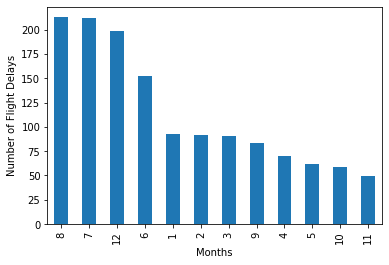

In [9]:
dataset1['MONTH'].value_counts().plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Number of Flight Delays')

The flight delays are maximum in the month 8, may be due to weather or other reasons.

In [10]:
crosstab = pd.crosstab(dataset['ARR_DEL15'],dataset['DEP_DEL15'],margins = False) 
crosstab

DEP_DEL15,0.0,1.0
ARR_DEL15,,
0.0,9130,538
1.0,340,1035


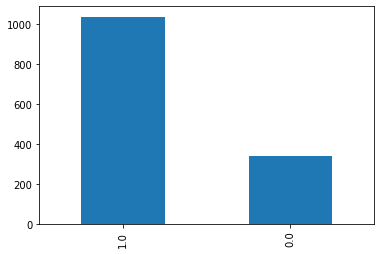

In [11]:
dataset1['DEP_DEL15'].value_counts().plot(kind='bar')

Text(0.5, 0, 'Arrival Delay')

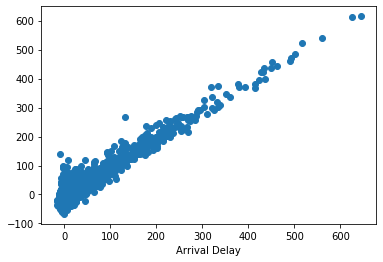

In [12]:
plt.scatter(dataset['DEP_DELAY'],dataset['ARR_DELAY'])
plt.xlabel('Departure Delay')
plt.xlabel('Arrival Delay')

It can be seen that if the departure is delayed then the arrival is also delayed i.e, Arrival and Departure delay time are positively correlated. 

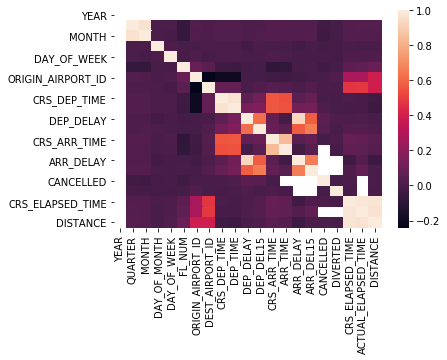

In [13]:
sns.heatmap(dataset.corr())

In [14]:
crosstab = pd.crosstab(dataset['ARR_DEL15'],dataset['DEST'],margins = False) 
crosstab

DEST,ATL,DTW,JFK,MSP,SEA
ARR_DEL15,,,,,
0.0,2793,1972,1062,2152,1689
1.0,368,221,211,299,276


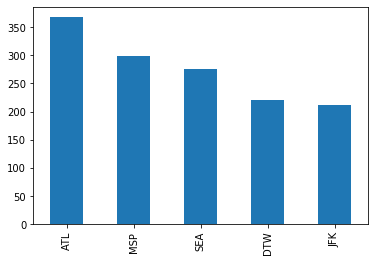

In [15]:
dataset1['DEST'].value_counts().plot(kind='bar')

In [16]:
crosstab = pd.crosstab(dataset['ARR_DEL15'],dataset['ORIGIN'],margins = False) 
crosstab

ORIGIN,ATL,DTW,JFK,MSP,SEA
ARR_DEL15,,,,,
0.0,2696,1908,1111,2170,1783
1.0,363,259,220,333,200


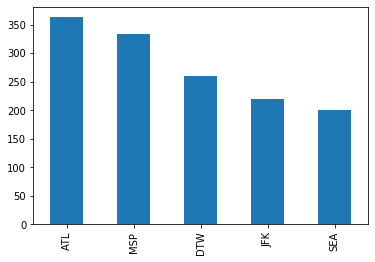

In [17]:
dataset1['ORIGIN'].value_counts().plot(kind='bar')

It can be seen that ATL location has highest number of Flight Delays.

In [18]:
# Flight with large number of Delays
dataset1['FL_NUM'].idxmax()

5562

5562 - Flight Number has the largest number of delays. 

## Taking care of Missing Data

In [19]:
# Dataset with significant features
df = dataset[["FL_NUM", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME","DEP_DEL15", "ARR_DEL15"]]
print(df.isnull().sum())
print(df.shape)

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64
(11231, 9)


Drop the missing values along rows

In [20]:
df.dropna(axis=0,inplace=True)
df.shape

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(11043, 9)

Convert CRS Arrival Time to hours

In [21]:
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME']//100
df.head()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


## Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['DEST'] = le.fit_transform(df['DEST'])
df['ORIGIN'] = le.fit_transform(df['ORIGIN'])
df.head()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [23]:
df['DEST'].unique()

array([4, 3, 1, 0, 2])

## Splitting of Dataset : Train and Test dataset

In [24]:
# Independent variable dataset
x = df.loc[:,'FL_NUM':'DEP_DEL15'].values
print(x.shape)
x

(11043, 8)


array([[1.399e+03, 1.000e+00, 1.000e+00, ..., 4.000e+00, 2.100e+01,
        0.000e+00],
       [1.476e+03, 1.000e+00, 1.000e+00, ..., 3.000e+00, 1.400e+01,
        0.000e+00],
       [1.597e+03, 1.000e+00, 1.000e+00, ..., 4.000e+00, 1.200e+01,
        0.000e+00],
       ...,
       [1.823e+03, 1.200e+01, 3.000e+01, ..., 4.000e+00, 2.200e+01,
        0.000e+00],
       [1.901e+03, 1.200e+01, 3.000e+01, ..., 4.000e+00, 1.800e+01,
        0.000e+00],
       [2.005e+03, 1.200e+01, 3.000e+01, ..., 1.000e+00, 9.000e+00,
        0.000e+00]])

In [25]:
# Dependent dataset
y = df.loc[:,'ARR_DEL15'].values
print(y.shape)
y

(11043,)


array([0., 0., 0., ..., 0., 0., 0.])

## One Hot Encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder     #one hot encoding to origin and destination column
one = OneHotEncoder()
z=one.fit_transform(x[:,4:5]).toarray()
t=one.fit_transform(x[:,5:6]).toarray() 

In [27]:
z

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [28]:
t

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [29]:
x=np.delete(x,[4,5],axis=1)    # remove origin and destination column with categoricl variable
x.shape

(11043, 6)

In [30]:
x=np.concatenate((t,z,x),axis = 1)  # adding the one hot encoded column to x

In [31]:
x.shape

(11043, 16)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (7730, 16)
x_test (3313, 16)
y_train (7730,)
y_test (3313,)


## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
x_train

array([[-0.63715446, -0.49696611, -0.36094626, ..., -0.99093882,
        -0.40140576, -0.41313435],
       [-0.63715446, -0.49696611, -0.36094626, ..., -0.99093882,
         1.18838112, -0.41313435],
       [-0.63715446, -0.49696611, -0.36094626, ..., -0.4873256 ,
        -0.60012912,  2.42052008],
       ...,
       [-0.63715446, -0.49696611, -0.36094626, ...,  1.02351406,
        -0.99757584, -0.41313435],
       [-0.63715446, -0.49696611,  2.7704955 , ...,  0.51990084,
        -0.2026824 , -0.41313435],
       [-0.63715446, -0.49696611,  2.7704955 , ..., -0.4873256 ,
        -0.99757584, -0.41313435]])

In [50]:
from joblib import dump
dump(sc, 'pro.save')

['pro.save']

##  Decision Tree - Model Building

The criteria is set to Gini index, because it gives higher accuracy

To decide the depth of Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
arr = []
for i in range (3,10):
    dt = DecisionTreeClassifier(criterion='gini',random_state = 0,max_depth=i)
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    y_pred
    # Accuracy of Decision Tree
    t = accuracy_score(y_test,y_pred)  #no of correct pred/total no of pred
    arr.append([i,t])
arr

[[3, 0.9215212798068216],
 [4, 0.9166918201026261],
 [5, 0.9218231210383339],
 [6, 0.9175973437971627],
 [7, 0.9148807727135527],
 [8, 0.912767884092967],
 [9, 0.9091457893148204]]

The Decision Tree gives maximum accuracy at depth 5 

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',random_state = 0,max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [51]:
dump(dt, 'decision.save')

['decision.save']

In [38]:
y_pred = dt.predict(x_test)
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [39]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
# Accuracy of Decision Tree
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)  #no of correct pred/total no of pred

0.9218231210383339

In [41]:
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.658


In [42]:
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.684


In [43]:
#F-Measure
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.671


In [44]:
# ROC_AUC
import sklearn.metrics as metrics         
fpr1 ,tpr1 ,threshold1 =metrics.roc_curve(y_test,y_pred)
roc_auc1 = metrics.auc(fpr1,tpr1)

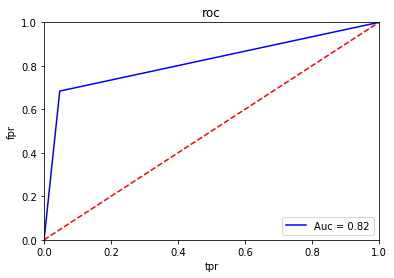

In [45]:
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr1,tpr1,'b',label = 'Auc = %0.2f'% roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

## Logistic Regression - Model Building

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [47]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred = lr.predict(x_test)
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)  #no of correct pred/total no of pred

0.9203139148807727

#### Desison Tree Accuracy        : 0.9218

#### Logistic Regresion Accuracy : 0.9203